## Import necessesary dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

#### Loading and exploring a single dataset

In [2]:
df = pd.read_csv('csvs/a1.csv', index_col = 0)
df.head()

,Count
Words,
perch,32
of,3832
the,6399
devil,33
part,55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11330 entries, perch to spell
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   11330 non-null  int64
dtypes: int64(1)
memory usage: 177.0+ KB


In [4]:
df.describe()

,Count
count,11330.000000
mean,11.511033
std,111.740866
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,6399.000000


#### Load csv file assosiated with every authors work
#### Concatenate every work and create a single dataframe

In [5]:
def get_dataset(author, num):
    """
    This function loads the desired csv file and 
    convert the values of `Count` column to `Frequency` 
    by dividing each value by total sum of count then
    rename the `Count` column with authors work and
    transpose the whole dataframe
    """
    path = 'csvs/' + author + str(num) + '.csv'
    df = pd.read_csv(path, index_col=0)
    total = df.Count.sum()
    df.loc[:, 'Count'] = df.Count/total
    df = df[df["Count"] > 0.0005]
    df.rename(columns={"Count": author+str(num)}, inplace=True)
    return df.transpose()

In [6]:
# Concatenate dataframes related to author A with author B
df = pd.concat([get_dataset(author, i) for author in ["a", "b"] for i in range(1, 6)])

# Concatenate "unknown" authors with resultant dataframe in previous step
df = pd.concat([df] + [ get_dataset(author, i) for author in ["u"] for i in ['a', 'b']])

In [7]:
# Concatenated dataframe (Final dataframe)
df

Words,of,the,i,said,gregory,compton,back,his,head,eyes,...,purpose,tears,opportunity,begin,doth,tender,lover,wine,bull,ashamed
a1,0.029382,0.049065,0.013610,0.002147,0.002607,0.000958,0.001004,0.009707,0.000820,0.001257,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a2,0.032751,0.055706,0.015578,0.001715,NaN,NaN,0.000704,0.008639,0.000598,0.001197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a3,0.029199,0.063049,0.011053,0.001584,NaN,NaN,0.000977,0.014844,0.000944,0.001567,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a4,0.026880,0.042672,0.016355,0.001507,NaN,NaN,0.000952,0.007428,0.000671,0.001366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a5,0.024663,0.045215,0.027519,0.004285,NaN,NaN,0.000836,0.008256,0.000975,0.001463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b1,0.046837,0.066431,0.007732,0.001125,NaN,NaN,NaN,0.008759,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b2,0.028159,0.047901,0.025633,0.003683,NaN,NaN,NaN,0.010042,NaN,0.000557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b3,0.030103,0.048090,0.017762,0.002728,NaN,NaN,NaN,0.011380,NaN,0.000507,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b4,0.041287,0.059278,0.013839,0.000761,NaN,NaN,NaN,0.008673,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b5,0.031992,0.049854,0.031992,0.001568,NaN,NaN,0.000817,0.008986,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Drop columns if it contain atleast one NaN value

In [8]:
df.isnull().any()

Words
of         False
the        False
i          False
said        True
gregory     True
           ...  
tender      True
lover       True
wine        True
bull        True
ashamed     True
Length: 597, dtype: bool

In [9]:
df.dropna(axis=1, inplace=True)
df

Words,of,the,i,his,in,which,that,is,what,them,...,good,my,you,first,are,may,me,your,how,must
a1,0.029382,0.049065,0.013610,0.009707,0.016332,0.001587,0.013679,0.004946,0.002737,0.002293,...,0.001549,0.002576,0.012184,0.001196,0.002929,0.000790,0.003113,0.002507,0.001020,0.000882
a2,0.032751,0.055706,0.015578,0.008639,0.017635,0.001564,0.014869,0.006105,0.002233,0.002172,...,0.001091,0.003440,0.009378,0.001041,0.003490,0.000739,0.002489,0.002213,0.000578,0.000774
a3,0.029199,0.063049,0.011053,0.014844,0.015535,0.002393,0.012552,0.004566,0.002022,0.002595,...,0.000994,0.002308,0.007329,0.001213,0.002359,0.000590,0.002376,0.000977,0.000927,0.000910
a4,0.026880,0.042672,0.016355,0.007428,0.016231,0.001110,0.013896,0.005118,0.003014,0.002228,...,0.000985,0.003197,0.013796,0.001043,0.003064,0.000944,0.003793,0.002915,0.000878,0.001532
a5,0.024663,0.045215,0.027519,0.008256,0.013028,0.001811,0.015676,0.010381,0.003414,0.001951,...,0.001986,0.003832,0.016721,0.000906,0.004981,0.000906,0.004877,0.003274,0.001359,0.002160
b1,0.046837,0.066431,0.007732,0.008759,0.020416,0.010240,0.015646,0.014567,0.002776,0.002980,...,0.000857,0.002385,0.000968,0.001691,0.005960,0.002583,0.001184,0.000560,0.001090,0.001324
b2,0.028159,0.047901,0.025633,0.010042,0.016349,0.008624,0.012952,0.007758,0.003463,0.001600,...,0.001680,0.010369,0.013523,0.001081,0.002728,0.001633,0.006523,0.003809,0.001320,0.001605
b3,0.030103,0.048090,0.017762,0.011380,0.016296,0.009857,0.011507,0.007126,0.003066,0.001813,...,0.001937,0.006370,0.010117,0.001123,0.003231,0.002183,0.004430,0.003611,0.000779,0.001706
b4,0.041287,0.059278,0.013839,0.008673,0.020597,0.011602,0.012663,0.008373,0.001822,0.002676,...,0.001338,0.005420,0.000876,0.000876,0.004036,0.002468,0.002999,0.000531,0.000600,0.000900
b5,0.031992,0.049854,0.031992,0.008986,0.017222,0.009428,0.011503,0.004217,0.002031,0.002208,...,0.001435,0.017420,0.002561,0.001391,0.001921,0.000640,0.012254,0.000684,0.000618,0.000729


# Visualizations

- Dimensions need to be normalized inorder to get better results.
- Here our dimensions are normalized since the values are converted to frequencies.

### 1-D Analysis

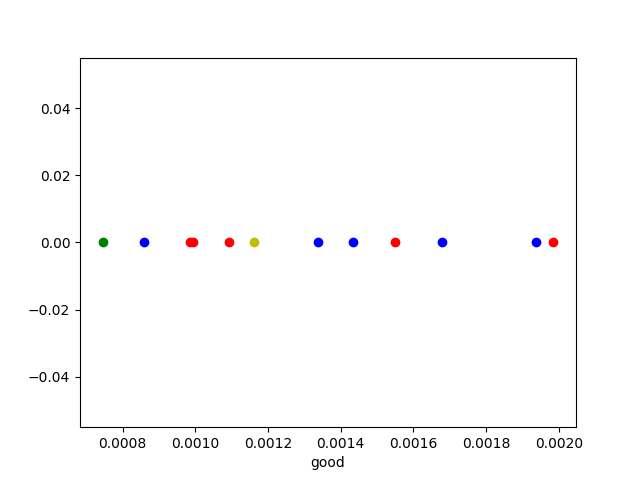

In [10]:
def plot_word_1d(w1):
    plt.scatter(df.loc["a1":"a5", w1], 5 * [0], c="r")  # Atherton, Gertrude Franklin Horn
    plt.scatter(df.loc["b1":"b5", w1], 5 * [0], c="b")  # Elliot George
    plt.scatter(df.loc["ua", w1], [0], c="y")  # unknown work 1
    plt.scatter(df.loc["ub", w1], [0], c="g")  # unknown work 2
    plt.xlabel(f"{w1}")
    plt.show()
plot_word_1d("good")

### 2-D Analysis

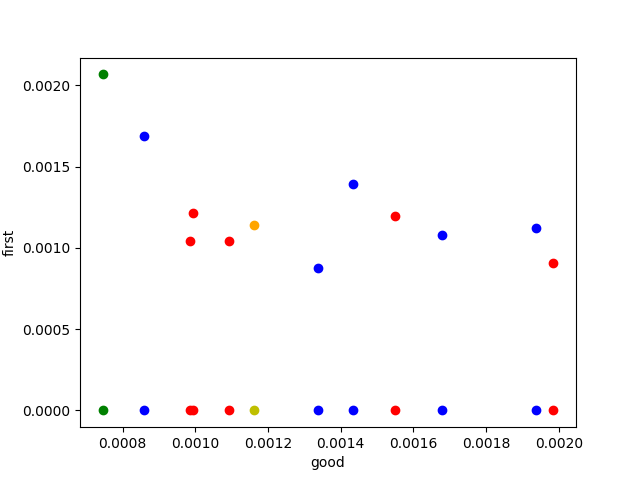

In [11]:
def plot_word_2d(w1, w2):
    plt.scatter(df.loc["a1":"a5", w1], df.loc["a1":"a5", w2], c="r")  # Atherton, Gertrude Franklin Horn
    plt.scatter(df.loc["b1":"b5", w1], df.loc["b1":"b5", w2], c="b")  # Elliot George
    plt.scatter(df.loc["ua", w1], df.loc["ua", w2], c="orange")  # unknown work 1
    plt.scatter(df.loc["ub", w1], df.loc["ub", w2], c="g")  # unknown work 2
    plt.xlabel(f"{w1}")
    plt.ylabel(f"{w2}")
    plt.show()
plot_word_2d("good", "first")

### 3-D Analysis

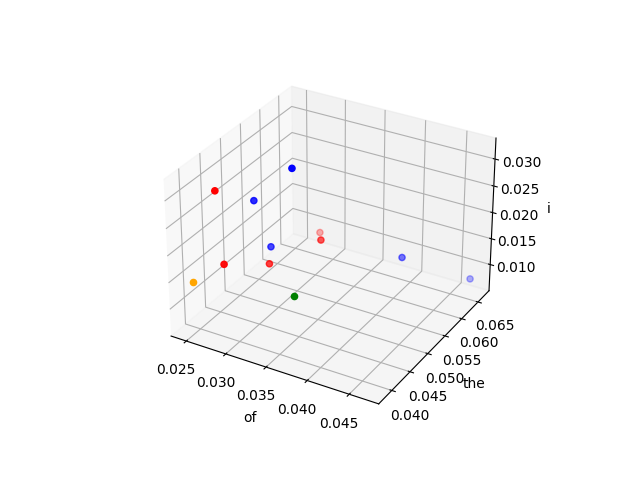

In [12]:
def plot_word_3d(w1, w2, w3):
    fig = plt.figure()
    ax = fig.add_subplot(projection="3d")
    
    ax.scatter(df.loc["a1":"a5", w1], df.loc["a1":"a5", w2], df.loc["a1":"a5", w3], c="r")  # Atherton, Gertrude Franklin Horn
    ax.scatter(df.loc["b1":"b5", w1], df.loc["b1":"b5", w2], df.loc["b1":"b5", w3], c="b")  # Elliot George
    ax.scatter(df.loc["ua", w1], df.loc["ua", w2], df.loc["ua", w3], c="orange")  # unknown work 1
    ax.scatter(df.loc["ub", w1], df.loc["ub", w2], df.loc["ub", w3], c="g")  # unknown work 2
    ax.set_xlabel(f"{w1}")
    ax.set_ylabel(f"{w2}")
    ax.set_zlabel(f"{w3}")
    plt.show()
    
plot_word_3d("of", "the", "i")

# KNN - K- Nearest Neighbors

In [13]:
ab = df.loc["a1":"b5", ["good", "first"]].copy()
ua = df.loc["ua", ["good", "first"]].copy()
ub = df.loc["ub", ["good", "first"]].copy()
ab

Words,good,first
a1,0.001549,0.001196
a2,0.001091,0.001041
a3,0.000994,0.001213
a4,0.000985,0.001043
a5,0.001986,0.000906
b1,0.000857,0.001691
b2,0.001680,0.001081
b3,0.001937,0.001123
b4,0.001338,0.000876
b5,0.001435,0.001391


In [14]:
ab.loc[:, "ua_distance"] = ((ab["good"] - ua["good"].item())**2 + (ab["first"] - ua["first"].item())**2)**0.5
ab

Words,good,first,ua_distance
a1,0.001549,0.001196,0.000391
a2,0.001091,0.001041,0.000120
a3,0.000994,0.001213,0.000184
a4,0.000985,0.001043,0.000201
a5,0.001986,0.000906,0.000855
b1,0.000857,0.001691,0.000632
b2,0.001680,0.001081,0.000521
b3,0.001937,0.001123,0.000775
b4,0.001338,0.000876,0.000315
b5,0.001435,0.001391,0.000372


In [15]:
ab = ab.sort_values("ua_distance")
ab

Words,good,first,ua_distance
a2,0.001091,0.001041,0.000120
a3,0.000994,0.001213,0.000184
a4,0.000985,0.001043,0.000201
b4,0.001338,0.000876,0.000315
b5,0.001435,0.001391,0.000372
a1,0.001549,0.001196,0.000391
b2,0.001680,0.001081,0.000521
b1,0.000857,0.001691,0.000632
b3,0.001937,0.001123,0.000775
a5,0.001986,0.000906,0.000855


In [16]:
ab = ab.reset_index()
ab

Words,index,good,first,ua_distance
0,a2,0.001091,0.001041,0.000120
1,a3,0.000994,0.001213,0.000184
2,a4,0.000985,0.001043,0.000201
3,b4,0.001338,0.000876,0.000315
4,b5,0.001435,0.001391,0.000372
5,a1,0.001549,0.001196,0.000391
6,b2,0.001680,0.001081,0.000521
7,b1,0.000857,0.001691,0.000632
8,b3,0.001937,0.001123,0.000775
9,a5,0.001986,0.000906,0.000855


In [17]:
ab = ab.rename(columns={"index": "Work"})

In [18]:
k = 5

ua_knn = ab.loc[0:k-1, ["Work", "ua_distance"]]
ua_knn

Words,Work,ua_distance
0,a2,0.000120
1,a3,0.000184
2,a4,0.000201
3,b4,0.000315
4,b5,0.000372


In [19]:
votes = [work[:-1] for work in ua_knn["Work"].values.tolist()] 
votes

['a', 'a', 'a', 'b', 'b']

In [20]:
results = { candidate:votes.count(candidate) for candidate in list(set(votes)) }
results

{'b': 2, 'a': 3}

In [21]:
knn_classification = max([ (tu[1], tu[0]) for tu in results.items() ])[1]
print(f"Work was classified as {knn_classification}!")

Work was classified as a!
